In [ ]:
from dotenv import load_dotenv
import os

In [1]:
# import pandas as pd
import modin.pandas as pd
import ray
ray.init()

2025-02-23 21:30:24,571	INFO worker.py:1841 -- Started a local Ray instance.


Python version:,3.11.9
Ray version:,2.42.1


In [ ]:
ray.shutdown()

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None 
pd.options.display.float_format = '{:.2f}'.format

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

# Cargar del dataset

## API

In [ ]:
from sodapy import Socrata

In [ ]:
_ = load_dotenv()
app_token = os.getenv("TOKEN")

In [ ]:
dataset_id = "kgxf-xxbe"
total_records = 7109704

In [ ]:
limit = 7000
offset = 0
results = []

In [ ]:
# Load client 
client = Socrata("www.datos.gov.co", app_token)


In [ ]:
while offset < total_records:
    print(f"Downloading records {offset} to {offset + limit}. {offset/total_records*100:.2f}% complete.")
    results += client.get(dataset_id, limit=limit, offset=offset)
    offset += limit

In [ ]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

## API REST

In [ ]:
url = "https://www.datos.gov.co/Educaci-n/Resultados-nicos-Saber-11/kgxf-xxbe/data_preview"

## Achivo csv

In [5]:
# Ruta del archivo
path_csv_file = "C:\\Users\\User\\Documents\\Prueba Tecser&Cloud\\Resultados__nicos_Saber_11_20250221.csv"

In [6]:
# Se define el diccionario de tipos de datos
dtypes = {
'PERIODO':"str",
'COLE_COD_DANE_ESTABLECIMIENTO':"str",
'COLE_COD_DANE_SEDE':"str",
'COLE_COD_DEPTO_UBICACION':"str",
'COLE_COD_MCPIO_UBICACION':"str",
'COLE_CODIGO_ICFES':"str",
'ESTU_COD_DEPTO_PRESENTACION':"str",
'ESTU_COD_MCPIO_PRESENTACION':"str",
'ESTU_COD_RESIDE_DEPTO':"str",
'ESTU_COD_RESIDE_MCPIO':"str",
'ESTU_FECHANACIMIENTO':"str",
# 'PUNT_INGLES':"float64",
# 'PUNT_MATEMATICAS':"float64",
# 'PUNT_SOCIALES_CIUDADANAS':"float64",
# 'PUNT_C_NATURALES':"float64",
# 'PUNT_LECTURA_CRITICA':"float64",
# 'PUNT_GLOBAL':"float64",
}

In [7]:
# Se carga el archivo
saber11 = pd.read_csv(path_csv_file, low_memory=False, dtype=dtypes)

In [8]:
data = saber11.copy()

# Procesamiento y limpia de datos

In [9]:
data.head()

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_CODIGO_ICFES,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_NACIONALIDAD,ESTU_PAIS_RESIDE,ESTU_PRIVADO_LIBERTAD,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20131,CR,SB11201310000414,URBANO,N,B,ACADÉMICO,311848000812,311848000812,11,11001,022574,BOGOTA,FEMENINO,COMPLETA,BOGOTÁ D.C.,NO OFICIAL,GIMN FEMENINO,GIMN FEMENINO,S,11,11001,11,11001,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,08/08/1994,F,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Cuatro,Educación profesional completa,Educación profesional completa,Estrato 6,Cuatro,Si,Si,Si,Si,B+,94,88,NaN,NaN,NaN,NaN
1,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70.00,65.00,69.00,339.00
2,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70.00,65.00,69.00,339.00
3,20122,TI,SB11201220204399,URBANO,N,A,TÉCNICO/ACADÉMICO,163130000718,163130000718,63,63130,013029,QUINDIO,MIXTO,MAÑANA,CALARCÁ,OFICIAL,INSTITUCION EDUCATIVA ANTONIO NARIÑO,ANTONIO NARIÑO,S,63,63130,63,63130,QUINDIO,QUINDIO,PUBLICAR,ESTUDIANTE,20/05/1996,F,CALARCÁ,CALARCÁ,COLOMBIA,COLOMBIA,N,Dos,Secundaria (Bachillerato) incompleta,No sabe,Estrato 1,Cuatro,No,Si,Si,No,A1,48,45,NaN,NaN,NaN,NaN
4,20132,TI,SB11201320464198,URBANO,N,A,TÉCNICO,119001000559,119001000559,19,19001,046391,CAUCA,FEMENINO,MAÑANA,POPAYÁN,OFICIAL,CRISTO REY,SEDE CRISTO REY,S,19,19001,19,19001,CAUCA,CAUCA,PUBLICAR,ESTUDIANTE,19/03/1997,F,POPAYÁN,POPAYÁN,COLOMBIA,COLOMBIA,N,Cinco,Educación profesional completa,Educación profesional incompleta,Estrato 2,Ocho,No,Si,Si,Si,A-,43,52,NaN,NaN,NaN,NaN


In [10]:
print(f"Filas: {data.shape[0]}")
print(f"Columnas: {data.shape[1]}")

Filas: 7109704
Columnas: 51


In [11]:
cuenta_periodos = data['PERIODO'].value_counts().sort_index().reset_index()
cuenta_periodos.columns = ['Periodo', 'Cuenta']

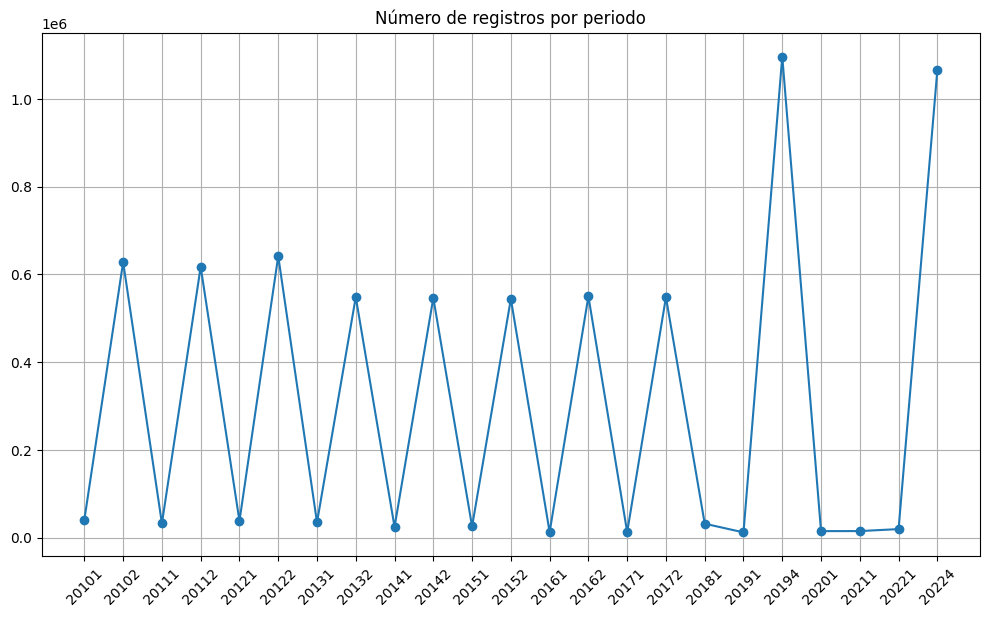

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cuenta_periodos["Periodo"],
        cuenta_periodos["Cuenta"], 
        marker="o",
        )
ax.set_title("Número de registros por periodo")
fig.tight_layout()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [13]:
data["Año"] = data["PERIODO"].str[:4].astype(int)

In [14]:
cuenta_años = data["Año"].value_counts().sort_index().reset_index()
cuenta_años.columns = ["Año", "Cuenta"]

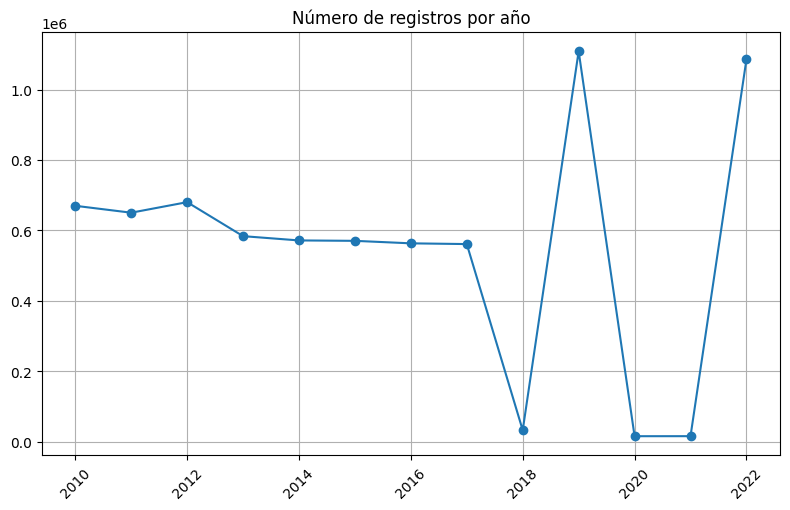

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(cuenta_años["Año"],
        cuenta_años["Cuenta"], 
        marker="o",
        )
ax.set_title("Número de registros por año")
fig.tight_layout()
plt.grid()
plt.xticks(rotation=45)
plt.show()

### Estimación años

In [16]:
X = cuenta_años.loc[:7, "Año"].values.reshape(-1, 1)
y = cuenta_años.loc[:7, "Cuenta"].values.reshape(-1, 1)

In [17]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

LinearRegression()

In [18]:
y_pred = modelo.predict(np.array([2017, 2018, 2019]).reshape(-1, 1))
y_pred

array([[542323.        ],
       [524009.17857143],
       [505695.35714286]])

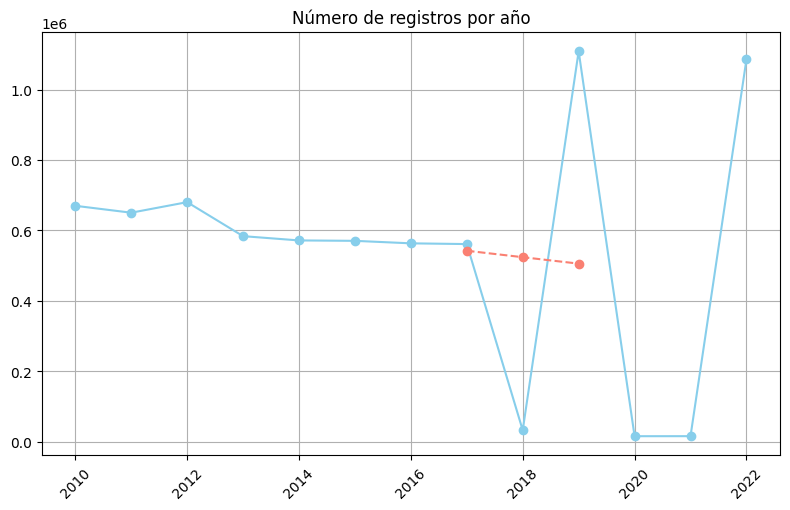

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(cuenta_años["Año"],
        cuenta_años["Cuenta"], 
        marker="o",
        color="skyblue",
        )
ax.plot([2017, 2018, 2019], 
        y_pred, 
        color="salmon", 
        marker="o",
        linestyle="--",
        )
ax.set_title("Número de registros por año")
fig.tight_layout()
plt.grid()
plt.xticks(rotation=45)
plt.show()

### ¿Qué pasa en el 2018 y en los años siguientes?

In [20]:
cuenta_periodo_2018_2022 = data.loc[data["Año"] >= 2018, "Año"].value_counts().sort_index().reset_index()

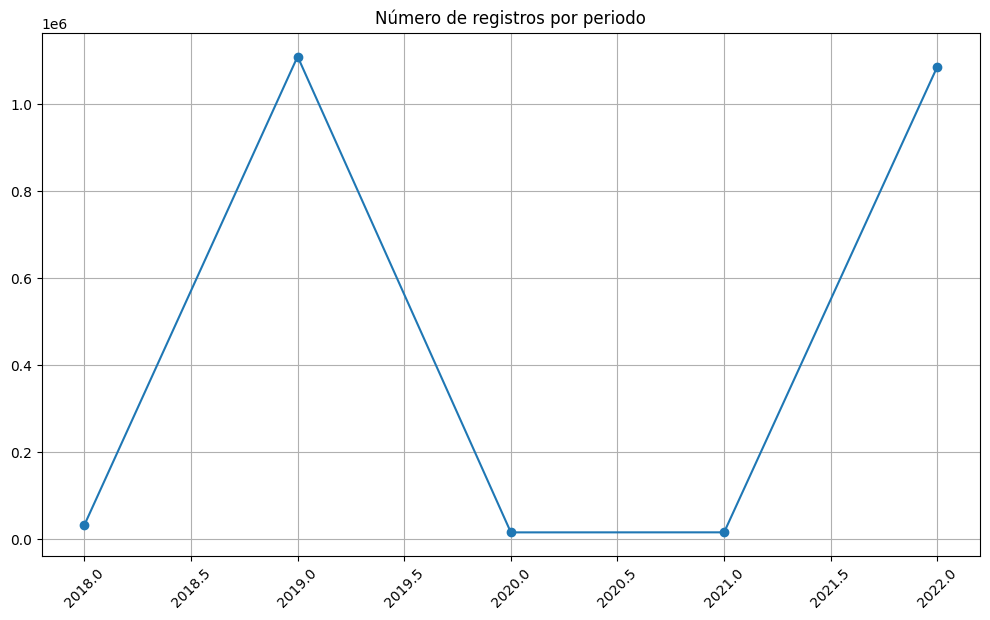

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cuenta_periodo_2018_2022["Año"],
        cuenta_periodo_2018_2022["count"], marker="o")
ax.set_title("Número de registros por periodo")
fig.tight_layout()

plt.grid()
plt.xticks(rotation=45)
plt.show()

**Conclusión:** Validando la información de los periodos posteriores al 2017 (2018 en adelante) con otro [dataset](https://medata.gov.co/dataset/1-011-08-000075) que contienen información acerca de las pruebas saber 11, se observa que la información consignada en el dataset, en las columnas *PERIODO* y *ESTU_CONSECUTIVO* no es congruente.

# EDA

In [22]:
# Separar columnas por tipo
cole_cols = [col for col in data.columns if "cole" in col.lower() and not "cod" in col.lower()]
estu_cols = [col for col in data.columns if "estu" in col.lower() and not "cod" in col.lower()]
fami_cols = [col for col in data.columns if "fami" in col.lower() and not "cod" in col.lower()]
punt_cols = [col for col in data.columns if "punt" in col.lower() and not "cod" in col.lower()]
ing_cols = [col for col in data.columns if "ingles" in col.lower() and not "cod" in col.lower()]
cods_cols = [col for col in data.columns if "cod" in col.lower()]

¿Los resultados globales han mejorado en el transcurso de 12 años?

In [23]:
print("Datos faltantes en columnas de puntajes")
(100 * data[punt_cols].isna().sum() / data.shape[0]).apply(lambda x: f"{x:.2f}%")

Datos faltantes en columnas de puntajes


PUNT_INGLES                  0.06%
PUNT_MATEMATICAS             0.00%
PUNT_SOCIALES_CIUDADANAS    36.70%
PUNT_C_NATURALES            36.70%
PUNT_LECTURA_CRITICA        36.70%
PUNT_GLOBAL                 36.70%
dtype: object

In [24]:
for materia in punt_cols:
    print(f"Materia: {materia}")
    for year in range(2010, 2023):
        print(f"Año: {year}", end=" ")
        print("datos nulos:", end=" ")
        print(f"{100 * data.loc[data['Año'] == year, materia].isna().sum() / data.loc[data['Año'] == year, materia].shape[0]:.2f}%")
    print("#"*30)

Materia: PUNT_INGLES
Año: 2010 datos nulos: 0.00%
Año: 2011 datos nulos: 0.00%
Año: 2012 datos nulos: 0.00%
Año: 2013 datos nulos: 0.00%
Año: 2014 datos nulos: 0.00%
Año: 2015 datos nulos: 0.00%
Año: 2016 datos nulos: 0.00%
Año: 2017 datos nulos: 0.00%
Año: 2018 datos nulos: 0.00%
Año: 2019 datos nulos: 0.00%
Año: 2020 datos nulos: 0.23%
Año: 2021 datos nulos: 0.30%
Año: 2022 datos nulos: 0.37%
##############################
Materia: PUNT_MATEMATICAS
Año: 2010 datos nulos: 0.00%
Año: 2011 datos nulos: 0.00%
Año: 2012 datos nulos: 0.00%
Año: 2013 datos nulos: 0.00%
Año: 2014 datos nulos: 0.00%
Año: 2015 datos nulos: 0.00%
Año: 2016 datos nulos: 0.00%
Año: 2017 datos nulos: 0.00%
Año: 2018 datos nulos: 0.00%
Año: 2019 datos nulos: 0.00%
Año: 2020 datos nulos: 0.00%
Año: 2021 datos nulos: 0.00%
Año: 2022 datos nulos: 0.00%
##############################
Materia: PUNT_SOCIALES_CIUDADANAS
Año: 2010 datos nulos: 100.00%
Año: 2011 datos nulos: 100.00%
Año: 2012 datos nulos: 100.00%
Año: 2013 

In [25]:
data[punt_cols] = data[punt_cols].astype(str).map(lambda x: x.replace(",", ".")).astype(float)

## Gráficas puntajes

In [26]:
resumen_materias = dict()
for materia in punt_cols:
    print(f"Materia: {materia}")
    resumen_año = dict()
    for year in range(2010, 2023):
        resumen_año[year] = data.loc[data["Año"] == year, materia].describe()
    resumen_materias[materia] = resumen_año
    print("#"*30)
        

Materia: PUNT_INGLES
##############################
Materia: PUNT_MATEMATICAS
##############################
Materia: PUNT_SOCIALES_CIUDADANAS
##############################
Materia: PUNT_C_NATURALES
##############################
Materia: PUNT_LECTURA_CRITICA
##############################
Materia: PUNT_GLOBAL
##############################


In [27]:
def f_resumen_materias(data, punt_cols):
    resumen_materias = dict()
    for materia in punt_cols:
        print(f"Materia: {materia}")
        resumen_año = dict()
        for year in range(2010, 2023):
            resumen_año[year] = data.loc[data["Año"] == year, materia].describe()
        resumen_materias[materia] = resumen_año
        print("#"*30)
    return resumen_materias

In [28]:
def plot_materia(materia, resumen_materias=resumen_materias):
    df = pd.DataFrame(resumen_materias[materia]).T
    df["inf_RQI"] =  df["50%"] - 1.5 * (df["75%"] - df["25%"])
    df["sup_RQI"] =  df["50%"] + 1.5 * (df["75%"] - df["25%"])
    df["inf_std"] =  df["mean"] - df["std"]
    df["sup_std"] =  df["mean"] + df["std"]


    fig, ax = plt.subplots(1,2, figsize=(20, 6))

    for label, color in [("50%", "salmon"), ("25%", "navy"), ("75%", "blue"), ("min", "green"), ("max", "red")]:
        ax[0].plot(df.index, 
                df.loc[:,label],
                marker="o",
                color=color,
                label=label,
                )

    for label, color in [("inf_RQI", "salmon"), ("sup_RQI", "navy")]:
        ax[0].plot(df.index, 
                df.loc[:,label],
                linestyle="--",
                color=color,
                label=label,
                )

    ax[0].legend()
    ax[0].grid()

    for label, color in [("inf_std", "salmon"), ("sup_std", "salmon")]:
        ax[1].plot(df.index,
                df.loc[:,label],
                linestyle="--",
                color=color,
                label=label,
                )
        
    ax[1].plot(df.index, 
            df.loc[:,"mean"],
                marker="o",
            color="skyblue",
            label="mean",
            )

    plt.legend()
    plt.grid()
    plt.show()

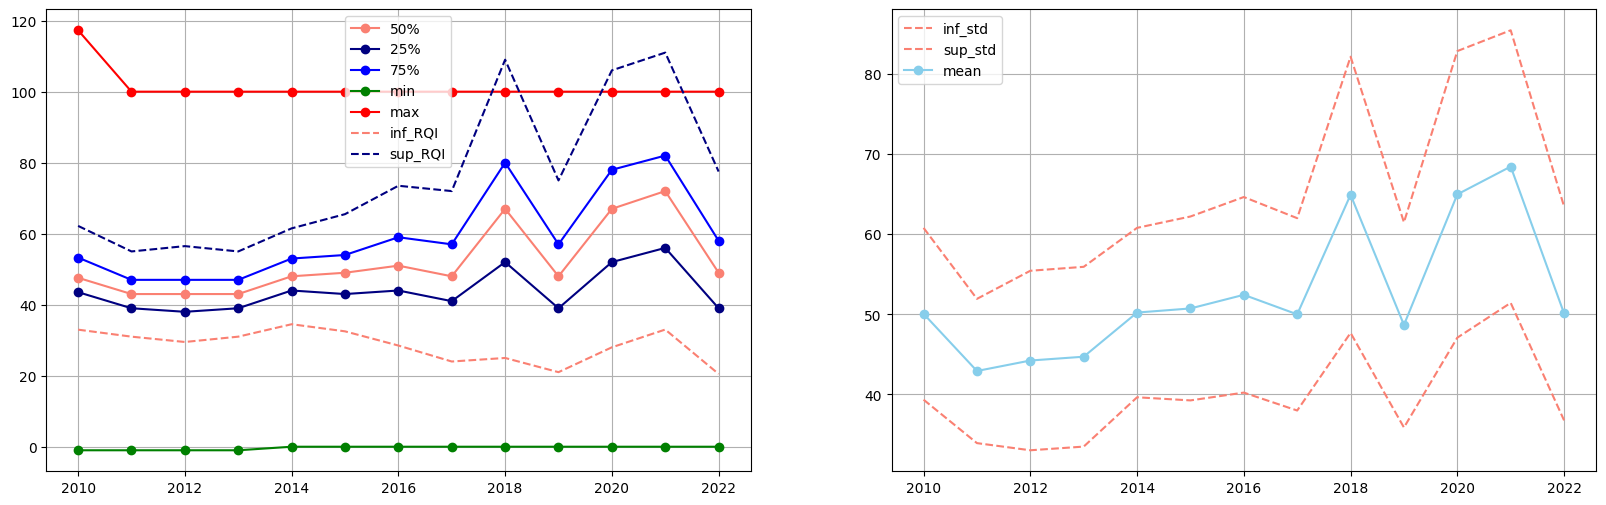

In [29]:
plot_materia("PUNT_INGLES")

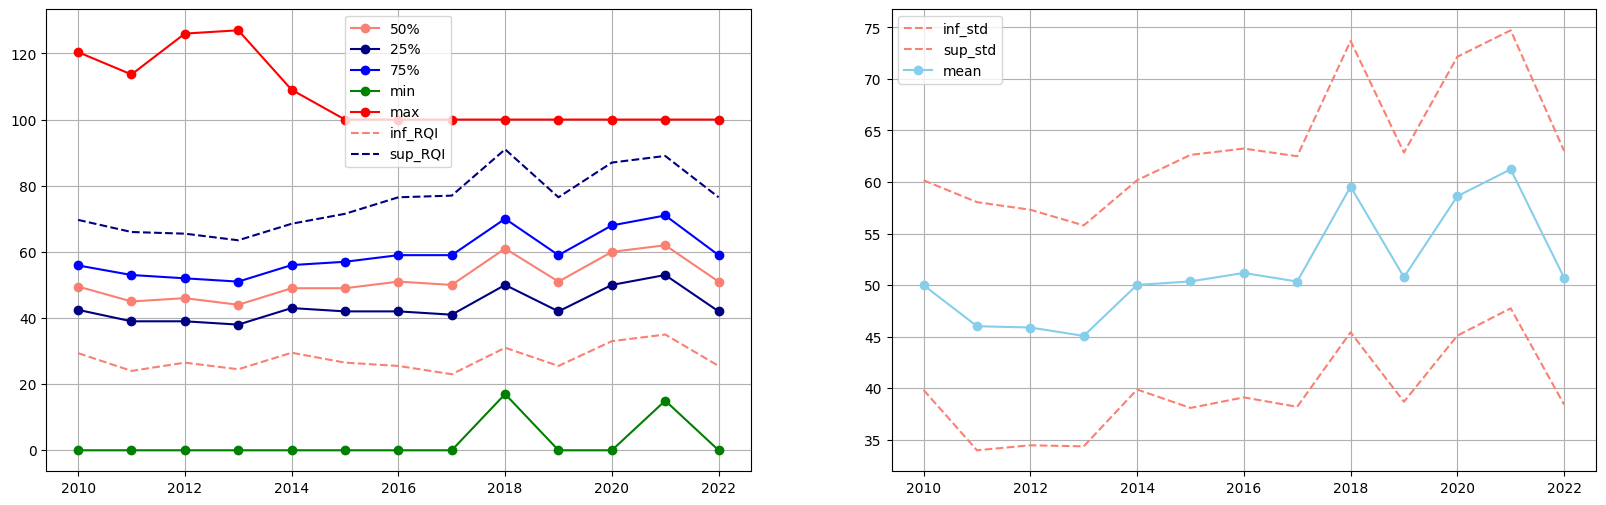

In [30]:
plot_materia("PUNT_MATEMATICAS")

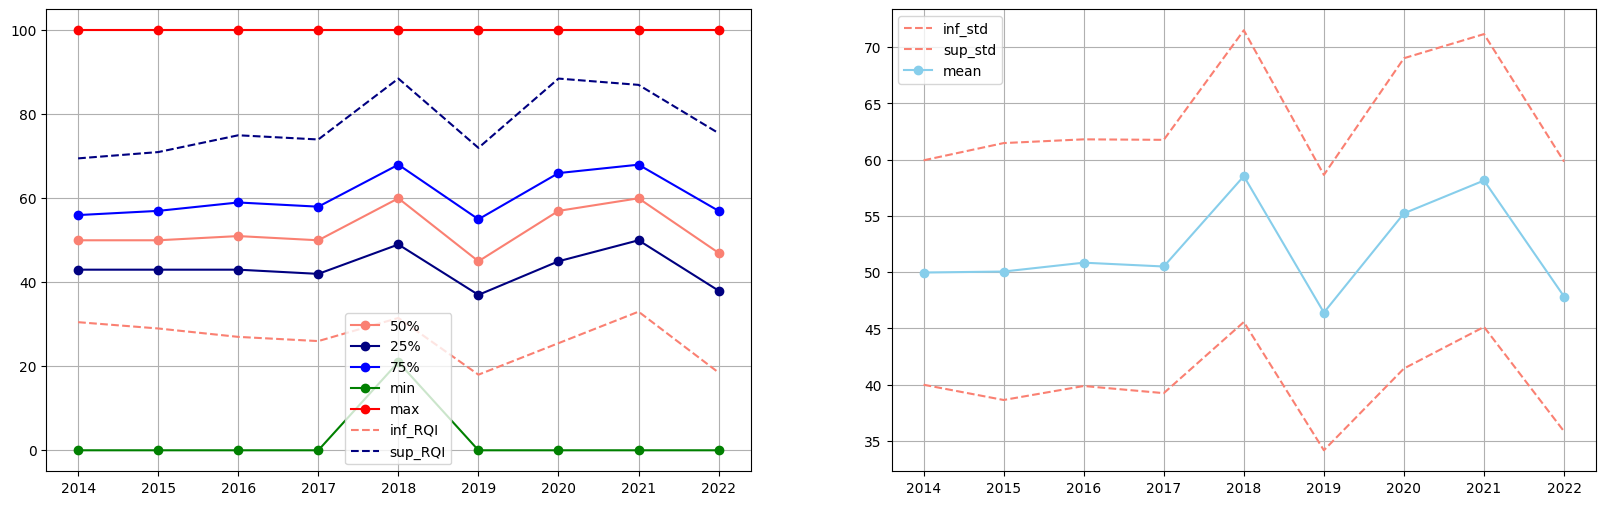

In [31]:
plot_materia("PUNT_SOCIALES_CIUDADANAS")

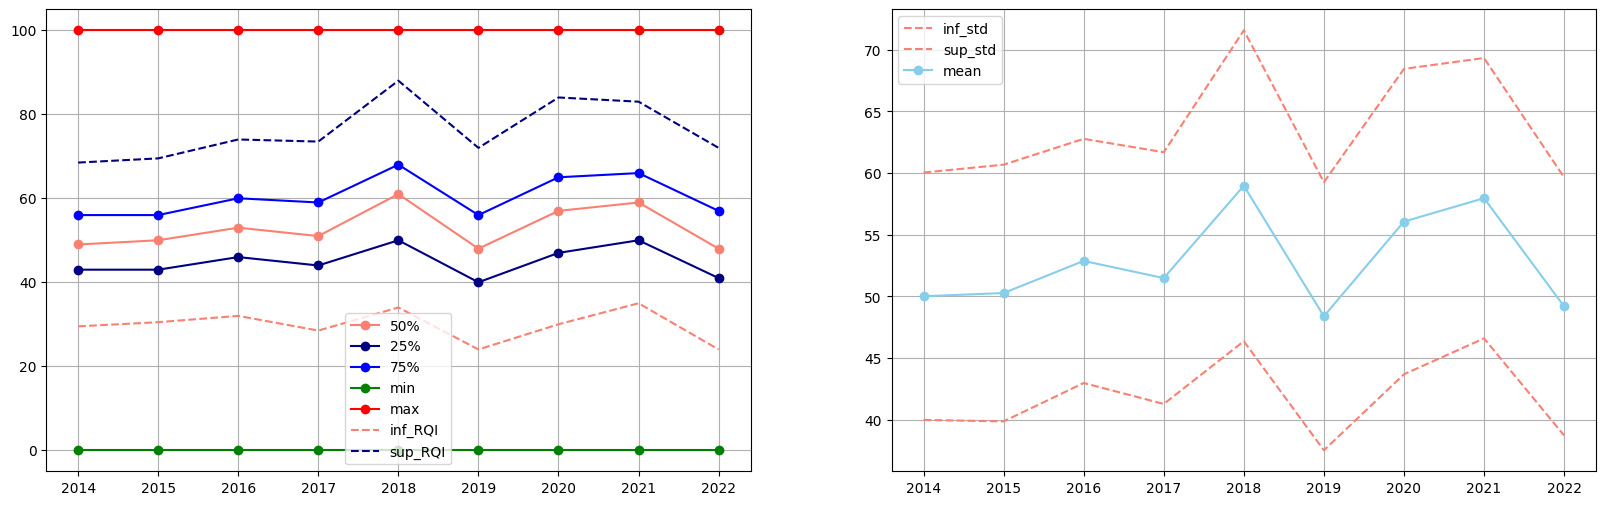

In [32]:
plot_materia("PUNT_C_NATURALES")

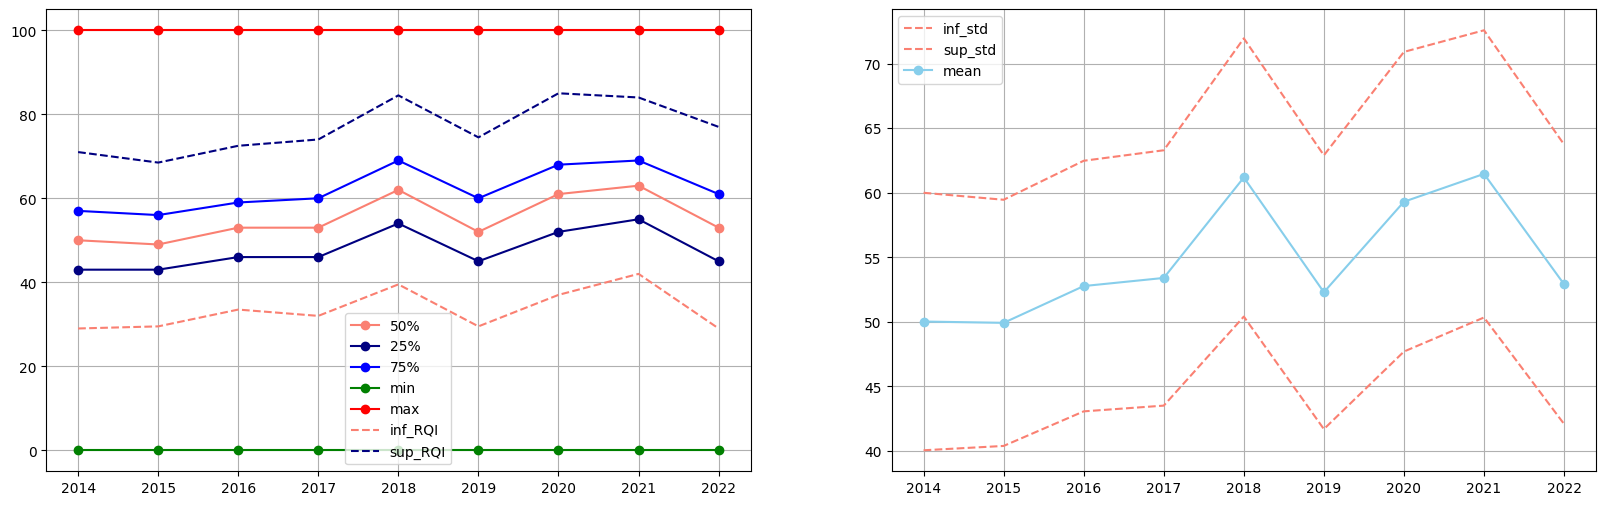

In [33]:
plot_materia("PUNT_LECTURA_CRITICA")

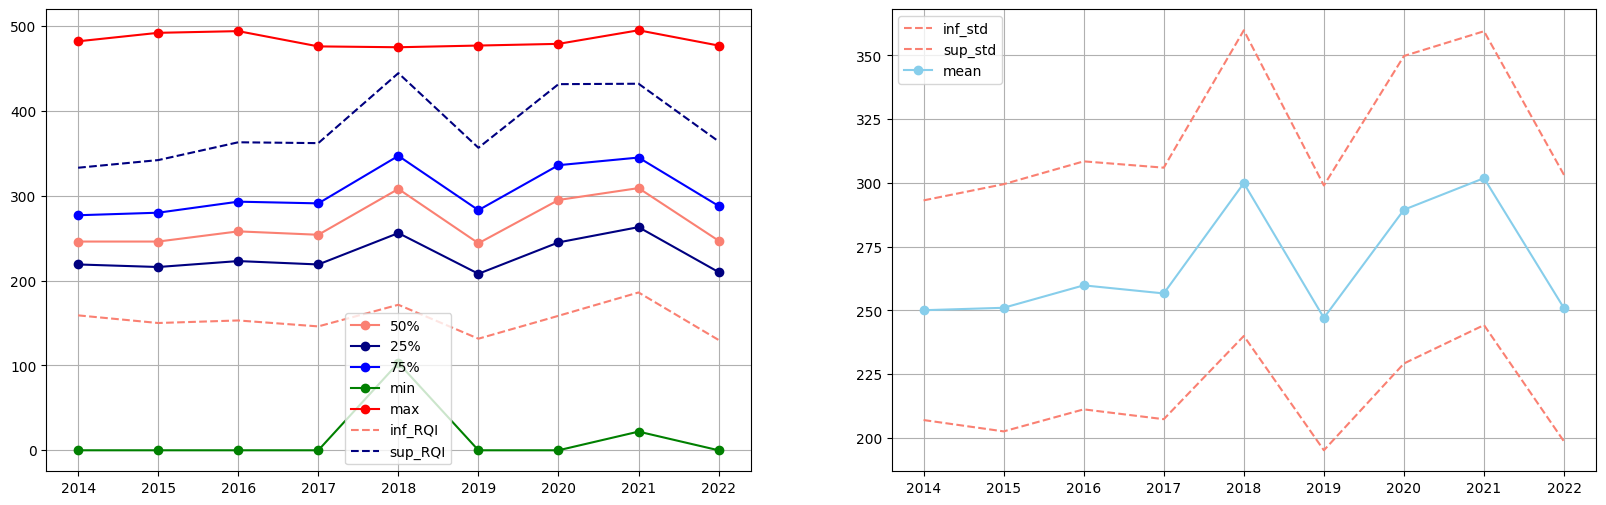

In [34]:
plot_materia("PUNT_GLOBAL")

## Colegio

In [35]:
data[cole_cols].describe()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL
count,7106673,6192834,7108168,6999492,7109681,7109681,7109681,7109681,7109681,7109681,7109681,7109681
unique,2,2,3,4,34,3,6,1411,2,11540,16061,2
top,URBANO,N,A,ACADÉMICO,ANTIOQUIA,MIXTO,MAÑANA,BOGOTÁ D.C.,OFICIAL,INSTITUCION EDUCATIVA SAN JOSE,INST EDUC CEFA,S
freq,6105963,6073632,6846791,3800542,1009317,6831631,3413717,1039161,5134719,16534,12926,6896352


In [36]:
cols_cole_encode = ['COLE_AREA_UBICACION',
                    'COLE_BILINGUE',
                    'COLE_CALENDARIO',
                    'COLE_CARACTER',
                    'COLE_GENERO',
                    'COLE_JORNADA',
                    'COLE_NATURALEZA',
                    'COLE_SEDE_PRINCIPAL']

data[cols_cole_encode].describe()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL
count,7106673,6192834,7108168,6999492,7109681,7109681,7109681,7109681
unique,2,2,3,4,3,6,2,2
top,URBANO,N,A,ACADÉMICO,MIXTO,MAÑANA,OFICIAL,S
freq,6105963,6073632,6846791,3800542,6831631,3413717,5134719,6896352


In [37]:
data[cols_cole_encode].isna().sum()

COLE_AREA_UBICACION      3031
COLE_BILINGUE          916870
COLE_CALENDARIO          1536
COLE_CARACTER          110212
COLE_GENERO                23
COLE_JORNADA               23
COLE_NATURALEZA            23
COLE_SEDE_PRINCIPAL        23
dtype: int64

In [38]:
f"Cantidad de datos completos con información de los colegios: {100 * data[cols_cole_encode].dropna().shape[0] / data.shape[0]:.2f}%"

'Cantidad de datos completos con información de los colegios: 86.82%'

In [39]:
data[cols_cole_encode] = data[cols_cole_encode].fillna("No disponible")

In [40]:
encoder = OneHotEncoder(sparse_output=False, drop="first")
cole_encoded = encoder.fit_transform(data[cols_cole_encode].values)
cole_encoded_df = pd.DataFrame(cole_encoded, columns=encoder.get_feature_names_out(cols_cole_encode))
cole_encoded_df.head()

,COLE_AREA_UBICACION_RURAL,COLE_AREA_UBICACION_URBANO,COLE_BILINGUE_No disponible,COLE_BILINGUE_S,COLE_CALENDARIO_B,COLE_CALENDARIO_No disponible,COLE_CALENDARIO_OTRO,COLE_CARACTER_NO APLICA,COLE_CARACTER_No disponible,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_GENERO_MASCULINO,COLE_GENERO_MIXTO,COLE_GENERO_No disponible,COLE_JORNADA_MAÑANA,COLE_JORNADA_NOCHE,COLE_JORNADA_No disponible,COLE_JORNADA_SABATINA,COLE_JORNADA_TARDE,COLE_JORNADA_UNICA,COLE_NATURALEZA_No disponible,COLE_NATURALEZA_OFICIAL,COLE_SEDE_PRINCIPAL_No disponible,COLE_SEDE_PRINCIPAL_S
0,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00


In [41]:
sse = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cole_encoded)
    sse.append(kmeans.inertia_)

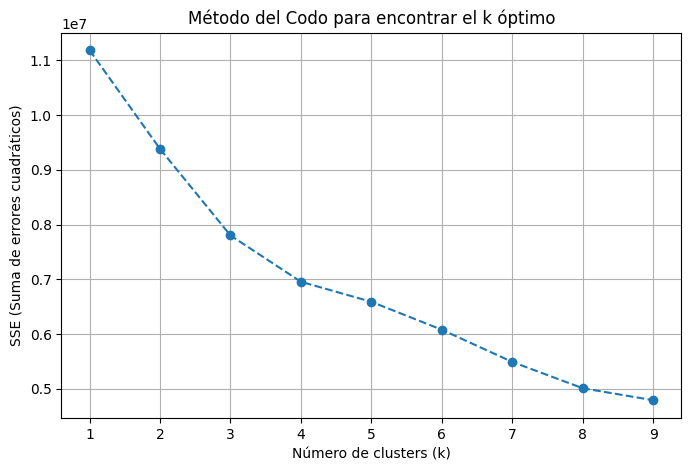

In [42]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Suma de errores cuadráticos)')
plt.title('Método del Codo para encontrar el k óptimo')
plt.xticks(k_values)
plt.grid()
plt.show()

### Nro de cluster: 3

In [43]:
# Definir el número de clusters
nro_cluster = 3

kmeans = KMeans(n_clusters=nro_cluster, random_state=144)
kmeans.fit(cole_encoded_df)
labels = kmeans.labels_
data['Cluster_cole'] = labels

In [44]:
resumen_materias_cluster = [f_resumen_materias(data.loc[data["Cluster_cole"] == i], punt_cols) for i in range(nro_cluster)]

Materia: PUNT_INGLES
##############################
Materia: PUNT_MATEMATICAS
##############################
Materia: PUNT_SOCIALES_CIUDADANAS
##############################
Materia: PUNT_C_NATURALES
##############################
Materia: PUNT_LECTURA_CRITICA
##############################
Materia: PUNT_GLOBAL
##############################
Materia: PUNT_INGLES
##############################
Materia: PUNT_MATEMATICAS
##############################
Materia: PUNT_SOCIALES_CIUDADANAS
##############################
Materia: PUNT_C_NATURALES
##############################
Materia: PUNT_LECTURA_CRITICA
##############################
Materia: PUNT_GLOBAL
##############################
Materia: PUNT_INGLES
##############################
Materia: PUNT_MATEMATICAS
##############################
Materia: PUNT_SOCIALES_CIUDADANAS
##############################
Materia: PUNT_C_NATURALES
##############################
Materia: PUNT_LECTURA_CRITICA
##############################
Materia: PUNT_GLOBAL

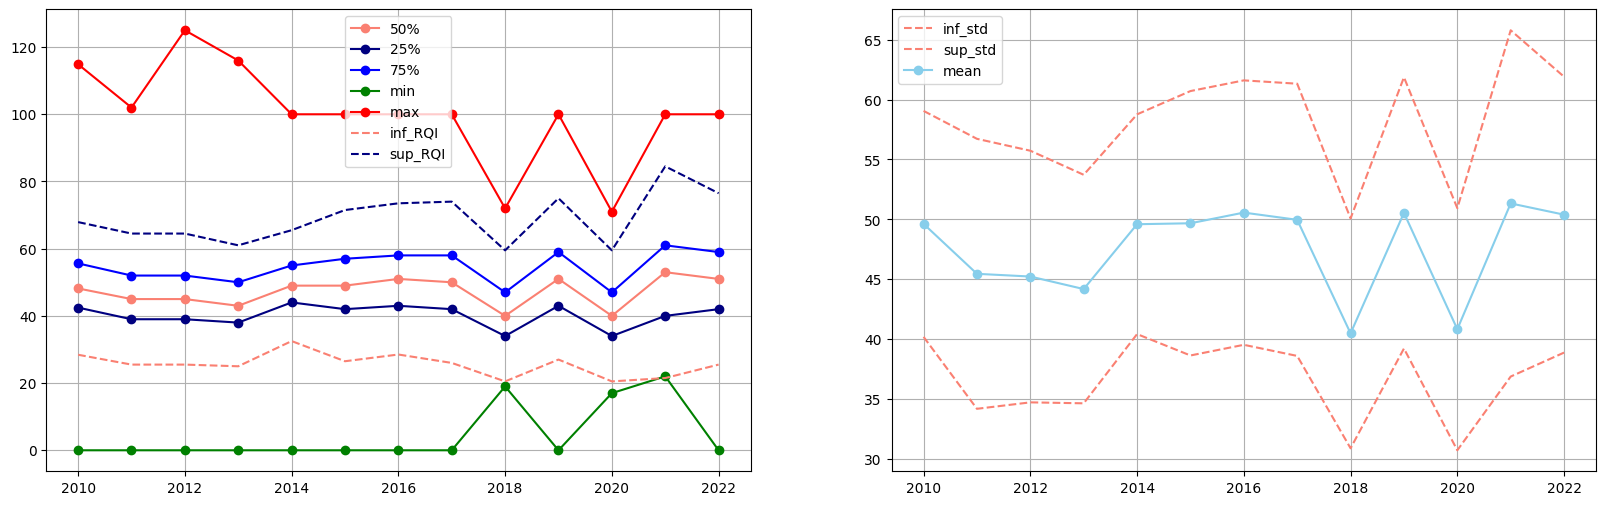

In [45]:
plot_materia("PUNT_MATEMATICAS", resumen_materias=resumen_materias_cluster[0])

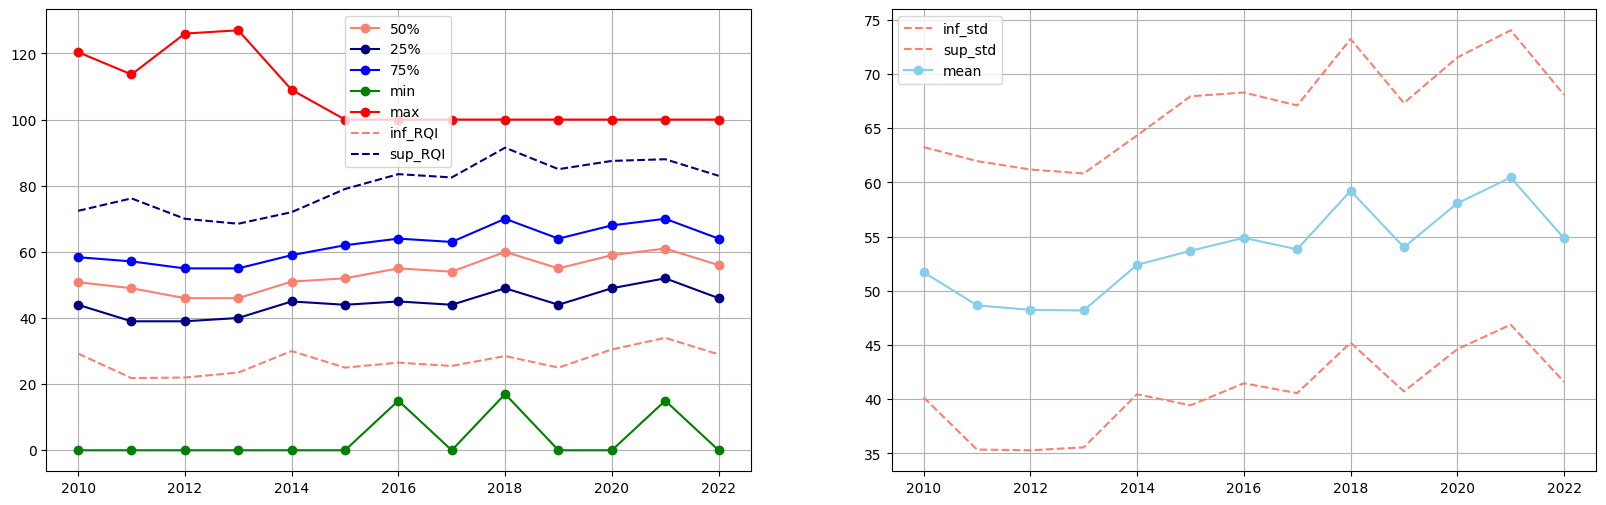

In [46]:
plot_materia("PUNT_MATEMATICAS", resumen_materias=resumen_materias_cluster[1])

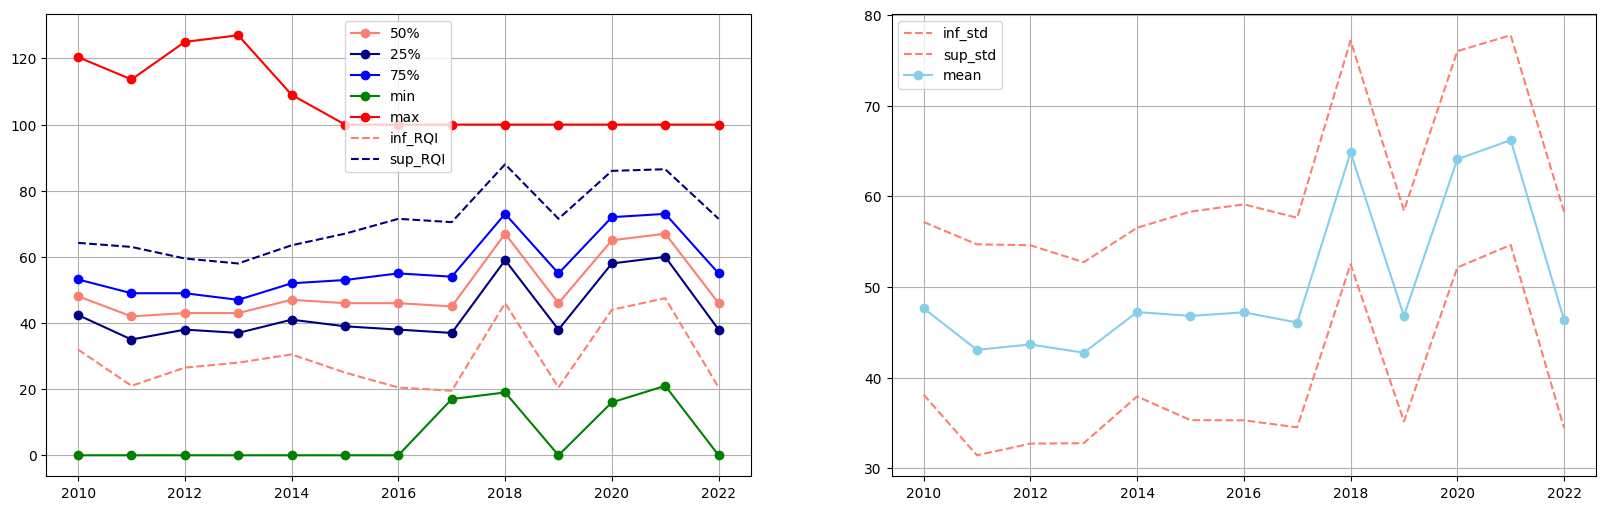

In [47]:
plot_materia("PUNT_MATEMATICAS", resumen_materias=resumen_materias_cluster[2])

#### Detalles

In [48]:
data["Cluster_cole"].unique()

array([1, 2, 0], dtype=int32)

In [49]:
(100 * data["Cluster_cole"].value_counts() / data.shape[0]).apply(lambda x: f"{x:.2f}%")

Cluster_cole
0    59.59%
1    26.33%
2    14.08%
Name: count, dtype: object

In [50]:
def resumen(df):
    res = df.describe()
    res.loc["freq"] = res.loc["freq"] / res.loc["count"]
    return res

In [51]:
resumen(data.loc[:, cols_cole_encode])

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL
count,7109704,7109704,7109704,7109704,7109704,7109704,7109704,7109704
unique,3,3,4,5,4,7,3,3
top,URBANO,N,A,ACADÉMICO,MIXTO,MAÑANA,OFICIAL,S
freq,0.86,0.85,0.96,0.53,0.96,0.48,0.72,0.97


In [52]:
resumen(data.loc[data["Cluster_cole"] == 0, cols_cole_encode])

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL
count,4236511,4236511,4236511,4236511,4236511,4236511,4236511,4236511
unique,2,3,3,5,3,6,1,2
top,URBANO,N,A,TÉCNICO/ACADÉMICO,MIXTO,MAÑANA,OFICIAL,S
freq,1.00,0.91,1.00,0.46,0.97,0.54,1.00,0.96


In [53]:
resumen(data.loc[data["Cluster_cole"] == 1, cols_cole_encode])

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL
count,1872212,1872212,1872212,1872212,1872212,1872212,1872212,1872212
unique,2,3,4,5,4,7,2,3
top,URBANO,N,A,ACADÉMICO,MIXTO,COMPLETA,NO OFICIAL,S
freq,1.00,0.80,0.88,0.78,0.92,0.43,1.00,1.00


In [54]:
resumen(data.loc[data["Cluster_cole"] == 2, cols_cole_encode])

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL
count,1000981,1000981,1000981,1000981,1000981,1000981,1000981,1000981
unique,2,3,4,5,3,6,2,2
top,RURAL,N,A,ACADÉMICO,MIXTO,MAÑANA,OFICIAL,S
freq,1.00,0.73,0.97,0.54,0.99,0.56,0.90,0.94


## Familia

In [55]:
fami_cols

['FAMI_CUARTOSHOGAR',
 'FAMI_EDUCACIONMADRE',
 'FAMI_EDUCACIONPADRE',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_PERSONASHOGAR',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENELAVADORA']

In [56]:
resumen(data[fami_cols])

,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA
count,6980942,6896878,6897281,6891485,6981476,6974935,6958487,6918080,6981618
unique,11,12,12,8,17,2,2,2,2
top,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 1,3 a 4,No,Si,Si,Si
freq,0.41,0.26,0.23,0.36,0.19,0.78,0.57,0.54,0.69


In [57]:
data["FAMI_CUARTOSHOGAR"].value_counts()

FAMI_CUARTOSHOGAR
Tres          2832380
Dos           2493326
Cuatro         929496
Uno            324927
Cinco          259602
Seis o mas      54870
Seis            50818
Siete           17875
Ocho             9075
Diez o más       5141
Nueve            3432
Name: count, dtype: int64

In [58]:
data["FAMI_CUARTOSHOGAR"].unique()

array(['Cuatro', 'Dos', 'Cinco', 'Tres', 'Uno', 'Seis', 'Diez o más',
       'Ocho', nan, 'Seis o mas', 'Siete', 'Nueve'], dtype=object)

In [59]:
data["FAMI_CUARTOSHOGAR"] = data["FAMI_CUARTOSHOGAR"].apply(lambda x: x if x not in ['Seis', 'Diez o más', 'Ocho', 'Seis o mas', 'Siete', 'Nueve'] else "Seis o mas")

In [60]:
fami_cols_encode = ['COLE_AREA_UBICACION',
                    'COLE_BILINGUE',
                    'COLE_CALENDARIO',
                    'COLE_CARACTER',
                    'COLE_GENERO',
                    'COLE_JORNADA',
                    'COLE_NATURALEZA',
                    'COLE_SEDE_PRINCIPAL']

data[cols_cole_encode].describe()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL
count,7109704,7109704,7109704,7109704,7109704,7109704,7109704,7109704
unique,3,3,4,5,4,7,3,3
top,URBANO,N,A,ACADÉMICO,MIXTO,MAÑANA,OFICIAL,S
freq,6105963,6073632,6846791,3800542,6831631,3413717,5134719,6896352


In [ ]:
data[cols_cole_encode].isna().sum()

In [ ]:
f"Cantidad de datos completos con información de los colegios: {100 * data[cols_cole_encode].dropna().shape[0] / data.shape[0]:.2f}%"

In [ ]:
data[cols_cole_encode] = data[cols_cole_encode].fillna("No disponible")

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop="first")
cole_encoded = encoder.fit_transform(data[cols_cole_encode].values)
cole_encoded_df = pd.DataFrame(cole_encoded, columns=encoder.get_feature_names_out(cols_cole_encode))
cole_encoded_df.head()

In [ ]:
sse = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cole_encoded)
    sse.append(kmeans.inertia_)

In [ ]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Suma de errores cuadráticos)')
plt.title('Método del Codo para encontrar el k óptimo')
plt.xticks(k_values)
plt.grid()
plt.show()

### Nro de cluster: 3

In [ ]:
# Definir el número de clusters
nro_cluster = 3

kmeans = KMeans(n_clusters=nro_cluster, random_state=144)
kmeans.fit(cole_encoded_df)
labels = kmeans.labels_
data['Cluster_cole'] = labels

In [ ]:
resumen_materias_cluster = [f_resumen_materias(data.loc[data["Cluster_cole"] == i], punt_cols) for i in range(nro_cluster)]

In [ ]:
plot_materia("PUNT_MATEMATICAS", resumen_materias=resumen_materias_cluster[0])

In [ ]:
plot_materia("PUNT_MATEMATICAS", resumen_materias=resumen_materias_cluster[1])

In [ ]:
plot_materia("PUNT_MATEMATICAS", resumen_materias=resumen_materias_cluster[2])

#### Detalles

In [ ]:
data["Cluster_cole"].unique()

In [ ]:
(100 * data["Cluster_cole"].value_counts() / data.shape[0]).apply(lambda x: f"{x:.2f}%")

In [ ]:
def resumen(df):
    res = df.describe()
    res.loc["freq"] = res.loc["freq"] / res.loc["count"]
    return res

In [ ]:
resumen(data.loc[:, cols_cole_encode])

In [ ]:
resumen(data.loc[data["Cluster_cole"] == 0, cols_cole_encode])

In [ ]:
resumen(data.loc[data["Cluster_cole"] == 1, cols_cole_encode])

In [ ]:
resumen(data.loc[data["Cluster_cole"] == 2, cols_cole_encode])

In [ ]:
data[cole_cols].describe()

In [ ]:
cols_cole_encode = ['COLE_AREA_UBICACION',
                    'COLE_BILINGUE',
                    'COLE_CALENDARIO',
                    'COLE_CARACTER',
                    'COLE_GENERO',
                    'COLE_JORNADA',
                    'COLE_NATURALEZA',
                    'COLE_SEDE_PRINCIPAL']

data[cols_cole_encode].describe()

In [ ]:
data[cols_cole_encode].isna().sum()

In [ ]:
f"Cantidad de datos completos con información de los colegios: {100 * data[cols_cole_encode].dropna().shape[0] / data.shape[0]:.2f}%"

In [ ]:
data[cols_cole_encode] = data[cols_cole_encode].fillna("No disponible")

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop="first")
cole_encoded = encoder.fit_transform(data[cols_cole_encode].values)
cole_encoded_df = pd.DataFrame(cole_encoded, columns=encoder.get_feature_names_out(cols_cole_encode))
cole_encoded_df.head()

In [ ]:
sse = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cole_encoded)
    sse.append(kmeans.inertia_)

In [ ]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Suma de errores cuadráticos)')
plt.title('Método del Codo para encontrar el k óptimo')
plt.xticks(k_values)
plt.grid()
plt.show()

### Nro de cluster: 3

In [ ]:
# Definir el número de clusters
nro_cluster = 3

kmeans = KMeans(n_clusters=nro_cluster, random_state=144)
kmeans.fit(cole_encoded_df)
labels = kmeans.labels_
data['Cluster_cole'] = labels

In [ ]:
resumen_materias_cluster = [f_resumen_materias(data.loc[data["Cluster_cole"] == i], punt_cols) for i in range(nro_cluster)]

In [ ]:
plot_materia("PUNT_MATEMATICAS", resumen_materias=resumen_materias_cluster[0])

In [ ]:
plot_materia("PUNT_MATEMATICAS", resumen_materias=resumen_materias_cluster[1])

In [ ]:
plot_materia("PUNT_MATEMATICAS", resumen_materias=resumen_materias_cluster[2])

#### Detalles

In [ ]:
data["Cluster_cole"].unique()

In [ ]:
(100 * data["Cluster_cole"].value_counts() / data.shape[0]).apply(lambda x: f"{x:.2f}%")

In [ ]:
def resumen(df):
    res = df.describe()
    res.loc["freq"] = res.loc["freq"] / res.loc["count"]
    return res

In [ ]:
resumen(data.loc[:, cols_cole_encode])

In [ ]:
resumen(data.loc[data["Cluster_cole"] == 0, cols_cole_encode])

In [ ]:
resumen(data.loc[data["Cluster_cole"] == 1, cols_cole_encode])

In [ ]:
resumen(data.loc[data["Cluster_cole"] == 2, cols_cole_encode])